# LP Packages

## Import packages

In [37]:
import numpy as np
import cvxopt
from cvxopt.glpk import ilp
import pulp
from scipy.optimize import linprog
from pyomo.environ import *

## CVXOPT

In [101]:
import numpy as np
from cvxopt import matrix, solvers
from scipy.optimize import linprog

c_cvxopt = matrix(np.array([-4.0, -5.0], dtype=float))
A_cvxopt = matrix(np.array([[2.0, 1.0], [1.0, 1.0]], dtype=float))
b_cvxopt = matrix(np.array([6.0, 4.0], dtype=float))

G_cvxopt = matrix(np.array([[-1.0, 0.0], [0.0, -1.0]]))  # Coefficients for the non-negativity constraints
h_cvxopt = matrix(np.array([0.0, 0.0]))  # Constants for the non-negativity constraints

sol_cvxopt = solvers.lp(c_cvxopt, G_cvxopt, h_cvxopt, A=A_cvxopt, b=b_cvxopt, options={'show_progress': False})

print("CVXOPT Solution:")
print("x1 =", round(sol_cvxopt['x'][0], 2))
print("x2 =", round(sol_cvxopt['x'][1], 2))
print("Objective fun value:", round(sol_cvxopt['primal objective'], 2))

c_scipy = np.array([-4, -5])
A_scipy = np.array([[2, 1], [1, 1]])
b_scipy = np.array([6, 4])

sol_scipy = linprog(c_scipy, A_ub=A_scipy, b_ub=b_scipy, bounds=(0, None))
print("\nScipy Solution:")
print("x1 =", round(sol_scipy.x[0], 2))
print("x2 =", round(sol_scipy.x[1], 2))
print("Objective fun value:", round(sol_scipy.fun, 2))


CVXOPT Solution:
x1 = 2.0
x2 = 2.0
Objective fun value: -18.0

Scipy Solution:
x1 = 0.0
x2 = 4.0
Objective fun value: -20.0


In [52]:
c_cvxopt = cvxopt.matrix([-4, -5], (2, 1), 'd')
A_cvxopt = cvxopt.matrix([[2, 1], [1, 1]], (2, 2), 'd')
b_cvxopt = cvxopt.matrix([6, 4], (2, 1), 'd')

sol_cvxopt = ilp(c_cvxopt, A_cvxopt, b_cvxopt, I=set([0, 1]), B=set([0, 1]))

print("CVXOPT solution:", sol_cvxopt)
print("Objective fun value:", -sol_cvxopt[1])

CVXOPT solution: ('optimal', <2x1 matrix, tc='d'>)
Objective fun value: [-1.00e+00]
[-1.00e+00]

GLPK Integer Optimizer 5.0
2 rows, 2 columns, 4 non-zeros
2 integer variables, all of which are binary
Preprocessing...
Objective value =  -9.000000000e+00
INTEGER OPTIMAL SOLUTION FOUND BY MIP PREPROCESSOR


## PuLP

2*x1 + x2 <= 6
x1 + x2 <= 4
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/petka/bakalarka/LP-packages/.venv/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c09668ba22e2480d8d85a0f703f73348-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c09668ba22e2480d8d85a0f703f73348-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj 0 Dual inf 8.9999998 (2)
0  Obj 0 Dual inf 8.9999998 (2)
1  Obj -20
Optimal - objective value -20
Optimal objective -20 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

PuLP Solution: [0. 4.]
PuLP 

Text(0, 0.5, '$y$')

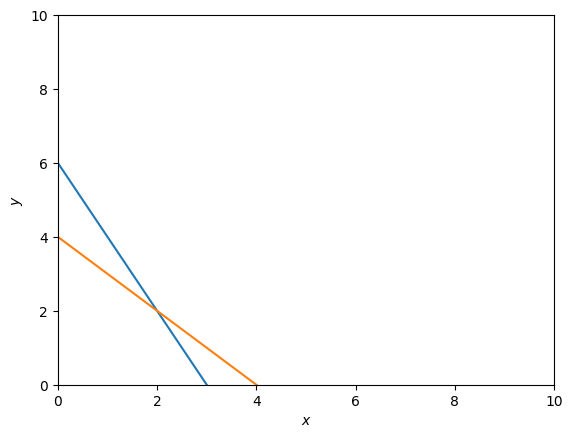

In [82]:
c = np.array([-4, -5])  # Coefficients of the objective function
A = np.array([[2, 1], [1, 1]])  # Coefficients of the inequality constraints
b = np.array([6, 4])  # Right-hand side of the inequality constraints

lp_problem_pulp = pulp.LpProblem("LP_Problem", pulp.LpMinimize)
x_pulp = [pulp.LpVariable("x{}".format(i+1), lowBound=0) for i in range(len(c))]
lp_problem_pulp += pulp.lpDot(c, x_pulp)
for i in range(len(A)):
    lp_problem_pulp += pulp.lpDot(A[i], x_pulp) <= b[i]
    print(pulp.lpDot(A[i], x_pulp), "<=", b[i])
lp_problem_pulp.solve()
sol_pulp = np.array([x_pulp[i].value() for i in range(len(x_pulp))])
print("PuLP Solution:", sol_pulp)
print("PuLP Objective Value:", pulp.value(lp_problem_pulp.objective))

# graph
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = (6 - 2*x)
y2 = (4 - x)

plt.plot(x, y1, label=r'$2x + y \leq 6$')
plt.plot(x, y2, label=r'$x + y \leq 4$')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


## SciPy

In [48]:
c = np.array([-4, -5])  # Coefficients of the objective function
A = np.array([[2, 1], [1, 1]])  # Coefficients of the inequality constraints
b = np.array([6, 4])  # Right-hand side of the inequality constraints


sol_scipy = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='highs')
print("Scipy Solution:", sol_scipy.x)
print("Objective fun value:", sol_scipy.fun)

Scipy Solution: [0. 4.]
Objective fun value: -20.0


## Pyomo

In [34]:
# Define the problem data
c = np.array([-4, -5])  # Coefficients of the objective function
A = np.array([[2, 1], [1, 1]])  # Coefficients of the inequality constraints
b = np.array([6, 4])  # Right-hand side of the inequality constraints

model = ConcreteModel()
model.x = Var(range(len(c)), within=NonNegativeReals)
model.objective = Objective(expr=sum(c[i] * model.x[i] for i in range(len(c))), sense=minimize)
model.constraints = ConstraintList()
for i in range(len(A)):
    model.constraints.add(sum(A[i, j] * model.x[j] for j in range(len(c))) <= b[i])
solver = SolverFactory('glpk')
results = solver.solve(model)
sol_pyomo = np.array([model.x[i].value for i in range(len(c))])
print("Pyomo Solution:", sol_pyomo)

solver 'glpk'


ApplicationError: No executable found for solver 'glpk'